In [1]:
# Dependencies
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
trails_dropped = pd.read_csv('trails_dropped.csv')
trails_dropped = pd.DataFrame(trails_dropped)
#trails_dropped

In [3]:
trails_diff = trails_dropped.groupby('difficulty')

In [4]:
#Make new dataframes based on difficulty

# All easy trails
indexNames = trails_dropped[(trails_dropped['difficulty'] == 'Easy')].index
easyTrails = trails_dropped.iloc [indexNames]

# All easyIntermediate trails
indexNames = trails_dropped[ (trails_dropped['difficulty'] == 'Easy/Intermediate')].index
easyIntermediateTrails = trails_dropped.iloc [indexNames] 

# All intermediate trails
indexNames = trails_dropped[(trails_dropped['difficulty'] == 'Intermediate')].index
intermediateTrails = trails_dropped.iloc [indexNames]

# All intermediateDifficult trails
indexNames = trails_dropped[(trails_dropped['difficulty'] == 'Intermediate/Difficult')].index
intermediateDifficultTrails = trails_dropped.iloc [indexNames] 

# All difficult trails
indexNames = trails_dropped[(trails_dropped['difficulty'] == 'Difficult')].index
difficultTrails = trails_dropped.iloc [indexNames] 

# All extremelyDifficult trails
indexNames = trails_dropped[(trails_dropped['difficulty'] == 'Extremely Difficult')].index
extremelyDifficultTrails = trails_dropped.iloc [indexNames] 

In [47]:
easyTrails.head()

,Unnamed: 0,id,name,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate,Range
0,0,7021990,Seasonal Wetland Loop,Hike,A scenic loop around one of the wetland areas ...,Easy,3.5,2,"Davis, California",3.1,10,-12,17,11,-121.6261,38.5505,Unknown,NaN,1970-01-01 00:00:00,0-100
2,2,7023706,Cosumnes Nature Loop,Hike,A nature-watcher's delight that follows trails...,Easy,4.0,9,"Thornton, California",4.0,88,-84,51,9,-121.4403,38.2657,Unknown,NaN,1970-01-01 00:00:00,0-100
4,4,7027546,Traylor Ranch Bird Sanctuary,Hike,There are lots of birds to see and lots of loo...,Easy,2.0,3,"Loomis, California",3.2,65,-65,430,396,-121.2058,38.8485,Unknown,NaN,1970-01-01 00:00:00,0-100
49,49,7018678,Armstrong Redwoods Tour,Hike,"A beautiful, easy hike through a ""young"" old-g...",Easy,4.2,6,"Guerneville, California",2.1,200,-199,359,252,-123.0030,38.5324,Unknown,NaN,1970-01-01 00:00:00,200-300
68,68,7051316,Richmond Marina Bay Trail,Hike,Hike along the San Francisco Bay Trail (Richmo...,Easy,5.0,2,"El Cerrito, California",8.1,23,-23,15,9,-122.3167,37.9001,Unknown,NaN,1970-01-01 00:00:00,0-100


In [26]:
#To determinate the best trails based on the elevation we have to be able to categorize in ranges
#to give more options according to the phisical conditions.
#find what is the max value in the ascent column to create the bins...
easyTrails.describe()

,Unnamed: 0,id,stars,starVotes,length,ascent,descent,high,low,longitude,latitude
count,107.000000,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,307.439252,7.046543e+06,1.502804,3.121495,1.652336,84.560748,-82.411215,805.691589,723.682243,-121.459848,38.488577
std,114.703159,2.589750e+04,1.841116,12.697281,3.455249,180.564272,135.696870,1284.249288,1251.602826,0.691808,0.422789
min,0.000000,7.004499e+06,0.000000,0.000000,0.000000,0.000000,-727.000000,11.000000,5.000000,-123.064500,37.159700
25%,260.500000,7.023716e+06,0.000000,0.000000,0.300000,4.000000,-95.000000,177.500000,72.500000,-122.133900,38.244650
50%,297.000000,7.039713e+06,0.000000,0.000000,0.500000,22.000000,-24.000000,412.000000,390.000000,-121.309000,38.566200
75%,407.000000,7.071834e+06,3.000000,1.000000,2.050000,98.500000,-7.500000,755.500000,647.000000,-121.188700,38.818450
max,499.000000,7.089972e+06,5.000000,114.000000,32.700000,1367.000000,0.000000,7862.000000,7449.000000,-119.574400,39.295900


In [48]:
age_bins = [-1,99, 199, 299, 399,499, 9999]
group_names = ["0-100", "100-200", "200-300", "300-400","400-500", "500+"]
easyTrails["Range"] = pd.cut(easyTrails["ascent"], age_bins, labels=group_names)
easyTrails.head()

/Users/rubenbenitez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Unnamed: 0,id,name,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate,Range
0,0,7021990,Seasonal Wetland Loop,Hike,A scenic loop around one of the wetland areas ...,Easy,3.5,2,"Davis, California",3.1,10,-12,17,11,-121.6261,38.5505,Unknown,NaN,1970-01-01 00:00:00,0-100
2,2,7023706,Cosumnes Nature Loop,Hike,A nature-watcher's delight that follows trails...,Easy,4.0,9,"Thornton, California",4.0,88,-84,51,9,-121.4403,38.2657,Unknown,NaN,1970-01-01 00:00:00,0-100
4,4,7027546,Traylor Ranch Bird Sanctuary,Hike,There are lots of birds to see and lots of loo...,Easy,2.0,3,"Loomis, California",3.2,65,-65,430,396,-121.2058,38.8485,Unknown,NaN,1970-01-01 00:00:00,0-100
49,49,7018678,Armstrong Redwoods Tour,Hike,"A beautiful, easy hike through a ""young"" old-g...",Easy,4.2,6,"Guerneville, California",2.1,200,-199,359,252,-123.0030,38.5324,Unknown,NaN,1970-01-01 00:00:00,200-300
68,68,7051316,Richmond Marina Bay Trail,Hike,Hike along the San Francisco Bay Trail (Richmo...,Easy,5.0,2,"El Cerrito, California",8.1,23,-23,15,9,-122.3167,37.9001,Unknown,NaN,1970-01-01 00:00:00,0-100


In [41]:
#after create the bins and categorize each trails according to the range we proceed to take the best for each range.
summary_easy_trails = easyTrails.groupby("Range")
summary_easy_trails_max = summary_easy_trails.max()
summary_easy_trails_max.reset_index(level = None, inplace = True)


In [28]:
#we clean the data dropping non relevant information
best_easy_elevation = summary_easy_trails_max.drop(['id',"Unnamed: 0","conditionStatus","conditionDate"],axis=1)
best_easy_elevation

,Range,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude
0,0-100,Woodland Trail,Trail,Easy,5.0,114,"Yosemite Valley, California",8.1,99,0,4052,3964,-119.5875,39.2959
1,100-200,Waterfall Trail,Trail,Easy,4.7,28,"Yosemite Valley, California",4.4,175,-3,7200,7067,-119.5744,39.2939
2,200-300,Snell Barn Loop,Trail,Easy,4.2,6,"North Auburn, California",3.7,228,-199,1563,1407,-121.1687,38.9643
3,300-400,Swinging Bridge Loop,Trail,Easy,5.0,8,"Sheridan, California",4.8,392,0,4243,3974,-119.6561,38.9738
4,400-500,Harden Lake Trail,Hike,Easy,3.0,1,"Yosemite Valley, California",5.9,499,-499,7862,7449,-119.6489,37.8703
5,500+,Quarry Trail,Trail,Easy,3.6,10,"Sacramento, California",32.7,1367,-373,1176,613,-121.0348,38.9119


In [49]:
easyIntermediateTrails.head()

,Unnamed: 0,id,name,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate,Range
1,1,7089186,Nature Loop,Hike,A common loop that explores the park.,Easy/Intermediate,5.0,1,"Carmichael, California",1.6,21,-20,77,69,-121.3127,38.6168,Unknown,NaN,1970-01-01 00:00:00,0-500
3,3,7016942,Lake Natoma Loop,Hike,Hike around Lake Natoma on bike paths with an ...,Easy/Intermediate,4.2,9,"Folsom, California",12.0,293,-294,194,110,-121.1804,38.6766,Unknown,NaN,1970-01-01 00:00:00,0-500
7,7,7003413,Cronan Ranch Loop,Hike,An enjoyable hike with spectacular views of th...,Easy/Intermediate,4.2,18,"Auburn Lake Trails, California",6.2,771,-760,1231,618,-120.9889,38.8260,All Clear,Dry,2019-11-24 05:19:55,500-1000
8,8,7070912,Black Hole of Calcutta Falls,Hike,"An easy, popular, scenic trail that is great f...",Easy/Intermediate,4.0,5,"Auburn, California",2.1,121,-122,701,600,-121.0400,38.9150,All Clear,Dry,2020-01-25 19:34:02,0-500
11,11,7089771,Foresthill Divide Loop,Hike,"A popular loop with hikers, runners and bikers.",Easy/Intermediate,5.0,1,"Auburn Lake Trails, California",11.2,1087,-1087,1905,1578,-120.9824,38.9427,Unknown,NaN,1970-01-01 00:00:00,1000-1500


In [43]:
age_bins_ei = [-1,499, 999, 1499, 1999,2499,2999]
group_names_ei = ["0-500", "500-1000", "1000-1500", "1500-2000","2000-2500","2500-3000"]
easyIntermediateTrails["Range"] = pd.cut(easyIntermediateTrails["ascent"], age_bins_ei, labels=group_names_ei)

/Users/rubenbenitez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
summary_easyintermeadite_trails = easyIntermediateTrails.groupby("Range")
summary_easyintermediate_trails_max = summary_easyintermeadite_trails.max()
summary_easyintermediate_trails_max.reset_index(level = None, inplace = True)

In [45]:
best_easyintermediate_elevation = summary_easyintermediate_trails_max.drop(['id',"Unnamed: 0","conditionStatus","conditionDate"],axis=1)
best_easyintermediate_elevation

,Range,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude
0,0-500,Zim Zim Falls Overlook,Trail,Easy/Intermediate,5.0,70.0,"Yosemite Valley, California",13.1,496.0,0.0,8720.0,8676.0,-119.5603,39.3234
1,500-1000,Zim Zim Falls,Trail,Easy/Intermediate,5.0,69.0,"Yosemite Valley, California",18.7,996.0,0.0,8783.0,8517.0,-119.7875,39.8058
2,1000-1500,Sierra Vista Preserve Loop,Trail,Easy/Intermediate,5.0,31.0,"Tahoma, California",12.3,1449.0,-13.0,6624.0,6240.0,-119.8454,39.0139
3,1500-2000,North Sonoma Mtn Trailhead to Sonoma Mtn Peak,Hike,Easy/Intermediate,3.8,6.0,"Eldridge, California",9.7,1747.0,-1748.0,2363.0,1066.0,-122.6044,38.3635
4,2000-2500,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2500-3000,Leavitt Meadows to Long Lakes Out-and-Back,Hike,Easy/Intermediate,5.0,1.0,"Bridgeport, California",22.0,2547.0,-2547.0,8620.0,7142.0,-119.5508,38.3338


In [33]:
#once we have the best trails for easy and easy/intermediate we merge the two tables.
df_easy = pd.merge(best_easy_elevation,best_easyintermediate_elevation, how="outer")

In [34]:
#we drop those None values  and crete a new column in the data frame to assign an specific color by difficulte
#this was usefull to see the diferrence in our graph.
df2_easy= df_easy.dropna(how='any')
df3_easy = pd.DataFrame(df2_easy)
df3_easy["color"]=df3_easy["difficulty"].replace(['Easy','Easy/Intermediate'],['lightgreen','darkgreen'])
df3_easy

,Range,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,color
0,0-100,Woodland Trail,Trail,Easy,5.0,114.0,"Yosemite Valley, California",8.1,99.0,0.0,4052.0,3964.0,-119.5875,39.2959,lightgreen
1,100-200,Waterfall Trail,Trail,Easy,4.7,28.0,"Yosemite Valley, California",4.4,175.0,-3.0,7200.0,7067.0,-119.5744,39.2939,lightgreen
2,200-300,Snell Barn Loop,Trail,Easy,4.2,6.0,"North Auburn, California",3.7,228.0,-199.0,1563.0,1407.0,-121.1687,38.9643,lightgreen
3,300-400,Swinging Bridge Loop,Trail,Easy,5.0,8.0,"Sheridan, California",4.8,392.0,0.0,4243.0,3974.0,-119.6561,38.9738,lightgreen
4,400-500,Harden Lake Trail,Hike,Easy,3.0,1.0,"Yosemite Valley, California",5.9,499.0,-499.0,7862.0,7449.0,-119.6489,37.8703,lightgreen
5,500+,Quarry Trail,Trail,Easy,3.6,10.0,"Sacramento, California",32.7,1367.0,-373.0,1176.0,613.0,-121.0348,38.9119,lightgreen
6,0-500,Zim Zim Falls Overlook,Trail,Easy/Intermediate,5.0,70.0,"Yosemite Valley, California",13.1,496.0,0.0,8720.0,8676.0,-119.5603,39.3234,darkgreen
7,500-1000,Zim Zim Falls,Trail,Easy/Intermediate,5.0,69.0,"Yosemite Valley, California",18.7,996.0,0.0,8783.0,8517.0,-119.7875,39.8058,darkgreen
8,1000-1500,Sierra Vista Preserve Loop,Trail,Easy/Intermediate,5.0,31.0,"Tahoma, California",12.3,1449.0,-13.0,6624.0,6240.0,-119.8454,39.0139,darkgreen
9,1500-2000,North Sonoma Mtn Trailhead to Sonoma Mtn Peak,Hike,Easy/Intermediate,3.8,6.0,"Eldridge, California",9.7,1747.0,-1748.0,2363.0,1066.0,-122.6044,38.3635,darkgreen


In [35]:
df3_easy['name'] = df3_easy['name'].replace('Swinging Bridge Loop','Swinging Bridge')
df3_easy['name'] = df3_easy['name'].replace('Harden Lake Trail','Harden Lake')
df3_easy['name'] = df3_easy['name'].replace('Zim Zim Falls Overlook','Zim Zim Overlook')
df3_easy['name'] = df3_easy['name'].replace('Sierra Vista Preserve Loop','Sierra Vista Preserve')
df3_easy['name'] = df3_easy['name'].replace('North Sonoma Mtn Trailhead to Sonoma Mtn Peak','North Sonoma Trailhead')
df3_easy['name'] = df3_easy['name'].replace('Leavitt Meadows to Long Lakes Out-and-Back','Leavitt Meadows')
df2_easy

,Range,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,color
0,0-100,Woodland Trail,Trail,Easy,5.0,114.0,"Yosemite Valley, California",8.1,99.0,0.0,4052.0,3964.0,-119.5875,39.2959,lightgreen
1,100-200,Waterfall Trail,Trail,Easy,4.7,28.0,"Yosemite Valley, California",4.4,175.0,-3.0,7200.0,7067.0,-119.5744,39.2939,lightgreen
2,200-300,Snell Barn Loop,Trail,Easy,4.2,6.0,"North Auburn, California",3.7,228.0,-199.0,1563.0,1407.0,-121.1687,38.9643,lightgreen
3,300-400,Swinging Bridge,Trail,Easy,5.0,8.0,"Sheridan, California",4.8,392.0,0.0,4243.0,3974.0,-119.6561,38.9738,lightgreen
4,400-500,Harden Lake,Hike,Easy,3.0,1.0,"Yosemite Valley, California",5.9,499.0,-499.0,7862.0,7449.0,-119.6489,37.8703,lightgreen
5,500+,Quarry Trail,Trail,Easy,3.6,10.0,"Sacramento, California",32.7,1367.0,-373.0,1176.0,613.0,-121.0348,38.9119,lightgreen
6,0-500,Zim Zim Overlook,Trail,Easy/Intermediate,5.0,70.0,"Yosemite Valley, California",13.1,496.0,0.0,8720.0,8676.0,-119.5603,39.3234,darkgreen
7,500-1000,Zim Zim Falls,Trail,Easy/Intermediate,5.0,69.0,"Yosemite Valley, California",18.7,996.0,0.0,8783.0,8517.0,-119.7875,39.8058,darkgreen
8,1000-1500,Sierra Vista Preserve,Trail,Easy/Intermediate,5.0,31.0,"Tahoma, California",12.3,1449.0,-13.0,6624.0,6240.0,-119.8454,39.0139,darkgreen
9,1500-2000,North Sonoma Trailhead,Hike,Easy/Intermediate,3.8,6.0,"Eldridge, California",9.7,1747.0,-1748.0,2363.0,1066.0,-122.6044,38.3635,darkgreen


<function matplotlib.pyplot.show(*args, **kw)>

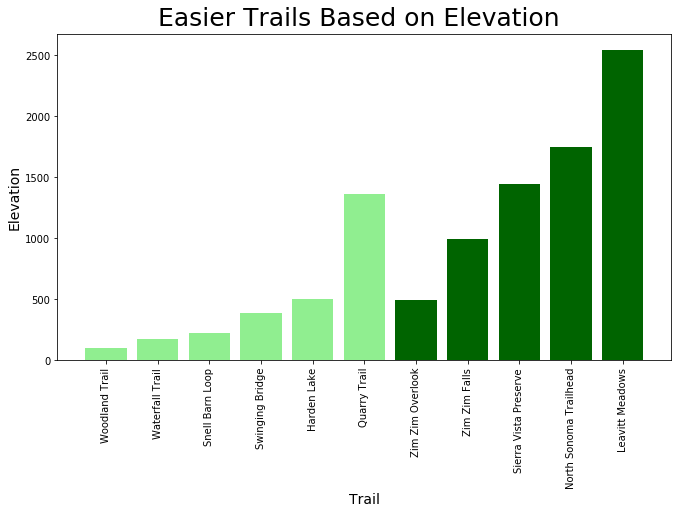

In [36]:
#Create the bar chart to see
plt.bar(df3_easy["name"],df3_easy["ascent"], color=df3_easy["color"], align="center")
plt.ylabel("Elevation", fontsize=14)
plt.xlabel("Trail", fontsize=14)
#plt.title("Best Easy Trail based on Elevation")
plt.figtext(.5,.9,' Easier Trails Based on Elevation', fontsize=25, ha='center')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"]=[11, 6]
#plt.grid()
plt.savefig("Resources/Best Easy.png",bbox_inches = 'tight')
plt.show

In [56]:
intermediateTrails.head()

,Unnamed: 0,id,name,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate
6,6,7018582,Hidden Falls Loop,Hike,A loop with waterfalls that are tucked away an...,Intermediate,4.0,9,"North Auburn, California",8.6,811,-812,982,431,-121.1644,38.9589,Unknown,NaN,1970-01-01 00:00:00
10,10,7089210,Marshall Monument Loop,Hike,A fun and educational loop.,Intermediate,5.0,2,"Placerville, California",3.5,600,-585,1263,746,-120.8928,38.8016,All Clear,Some Mud,2019-12-29 13:43:37
12,12,7063430,Independence Flat Trail Loop,Hike,Segment of the Mokelumne Coast to Crest Trail ...,Intermediate,5.0,1,"Jackson, California",4.3,754,-753,1193,593,-120.7497,38.2973,Unknown,NaN,1970-01-01 00:00:00
14,14,7037154,Fleming Meadow Trail #8,Hike,Enjoy a beautiful loop in the trees in the Pol...,Intermediate,4.1,8,"Pollock Pines, California",7.2,1018,-1024,4107,3589,-120.5452,38.7088,Unknown,NaN,1970-01-01 00:00:00
16,16,7023190,Stevens Trail,Hike,"This 7.7-mile out-and-back, moderately difficu...",Intermediate,4.5,27,"Colfax, California",7.7,1275,-1276,2384,1253,-120.9472,39.1056,Unknown,NaN,1970-01-01 00:00:00


In [57]:
age_bins_i = [-1,999, 1999, 2999,3999,4999,5999]
group_names_i = ["0-1000", "1000-2000", "2000-3000", "3000-4000","4000-5000","5000-6000"]
intermediateTrails["Range"] = pd.cut(intermediateTrails["ascent"], age_bins_i, labels=group_names_i)

/Users/rubenbenitez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
summary_intermeadite_trails = intermediateTrails.groupby("Range")
summary_intermediate_trails_max = summary_intermeadite_trails.max()
summary_intermediate_trails_max.reset_index(level = None, inplace = True)

In [59]:
best_intermediate_elevation = summary_intermediate_trails_max.drop(['id',"Unnamed: 0","conditionStatus","conditionDate"],axis=1)
best_intermediate_elevation

,Range,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude
0,0-1000,Zim Zim Falls Trail,Trail,Intermediate,5.0,46,"Yosemite Valley, California",9.4,991,0,10776,10106,-119.2721,39.4475
1,1000-2000,Wunderlich Loop,Trail,Intermediate,5.0,48,"Yosemite Valley, California",25.4,1982,0,10444,8918,-119.3346,39.6144
2,2000-3000,Rancho Ridge Loop,Hike,Intermediate,4.8,7,"Yosemite Valley, California",19.8,2547,-2003,9376,7897,-119.4705,38.9458
3,3000-4000,Western States Trail,Trail,Intermediate,4.7,3,"Jackson, California",27.6,3388,-3526,1650,595,-120.7497,38.8879
4,4000-5000,State Park Trifecta,Hike,Intermediate,5.0,1,"Saratoga, California",28.0,4083,-4122,2639,415,-122.1291,37.2555
5,5000-6000,Bay Area Ridge Trail: Table Rock and Palisades...,Trail,Intermediate,3.0,1,"Calistoga, California",15.7,5552,-1641,4309,398,-122.5772,38.5892


In [60]:
intermediateDifficultTrails.head()

,Unnamed: 0,id,name,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate,Range
5,5,7003896,Stebbins Cold Canyon Loop,Hike,A challenging trail with a great view of Lake ...,Intermediate/Difficult,4.3,29,"Winters, California",5.1,1413,-1409,1539,231,-122.0970,38.5119,Unknown,NaN,1970-01-01 00:00:00,1000-2000
9,9,7019896,Training Hill to Pig Farm to Robie Trail Loop,Hike,"After climbing half of Training Hill, this mer...",Intermediate/Difficult,4.0,4,"Auburn, California",2.6,752,-751,1358,612,-121.0399,38.9151,Unknown,NaN,1970-01-01 00:00:00,0-1000
18,18,7000146,Bald Mountain Loop,Hike,Mediocre dirt roads and some singletrack trail...,Intermediate/Difficult,4.0,9,"Kenwood, California",7.0,1794,-1798,2726,1206,-122.5141,38.4380,Unknown,NaN,1970-01-01 00:00:00,1000-2000
20,20,7041523,Mount Diablo Four Peaks Loop,Hike,"This long, challenging hike visits Mount Diabl...",Intermediate/Difficult,4.6,10,"Clayton, California",15.4,4406,-4404,3808,541,-121.9270,37.9221,All Clear,NaN,2020-02-08 12:08:02,4000-5000
21,21,7042934,Mount Diablo Falls Loop,Hike,This rugged and scenic hike explores the water...,Intermediate/Difficult,4.7,15,"Clayton, California",5.4,1107,-1105,1648,542,-121.9271,37.9221,All Clear,Dry,2020-02-15 14:28:53,1000-2000


In [61]:
age_bins_id = [-1,999, 1999, 2999,3999,4999,5999]
group_names_id = ["0-1000", "1000-2000", "2000-3000", "3000-4000","4000-5000","5000-6000"]
intermediateDifficultTrails["Range"] = pd.cut(intermediateDifficultTrails["ascent"], age_bins_id, labels=group_names_id)

/Users/rubenbenitez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
summary_intermeaditedi_trails = intermediateDifficultTrails.groupby("Range")
summary_intermediatedi_trails_max = summary_intermeaditedi_trails.max()
summary_intermediatedi_trails_max.reset_index(level = None, inplace = True)

In [63]:
best_intermediatedi_elevation = summary_intermediatedi_trails_max.drop(['id',"Unnamed: 0","conditionStatus","conditionDate"],axis=1)
best_intermediatedi_elevation

,Range,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude
0,0-1000,Upper Ritchey Trail,Trail,Intermediate/Difficult,5.0,22,"Yosemite Valley, California",6.9,874,0,9761,9521,-119.3705,39.4754
1,1000-2000,Wrights Lake to Grouse Lake,Trail,Intermediate/Difficult,5.0,251,"Yosemite Valley, California",14.2,1999,0,9209,7498,-119.3154,39.7622
2,2000-3000,Tahoe Rim Trail - Kingsbury to Star Lake,Hike,Intermediate/Difficult,5.0,49,"Yosemite Valley, California",22.8,2981,-2056,10725,8921,-119.3008,39.3459
3,3000-4000,Yosemite Valley Traverse,Hike,Intermediate/Difficult,5.0,45,"Yosemite Valley, California",19.6,3990,-3325,7704,4035,-119.6018,37.9204
4,4000-5000,North Dome Out and Back,Hike,Intermediate/Difficult,4.6,10,"Yosemite Valley, California",15.5,4760,-4404,7600,4030,-119.6022,37.9221
5,5000-6000,Hetch Hetchy Loop,Hike,Intermediate/Difficult,4.7,11,"Yosemite Valley, California",27.7,5499,-5500,7615,3777,-119.7883,37.9459


In [64]:
df_intermediate = pd.merge(best_intermediate_elevation,best_intermediatedi_elevation, how="outer")
#df_intermediate

In [65]:
df_intermediate["color"]=df_intermediate["difficulty"].replace(['Intermediate','Intermediate/Difficult'],['lightblue','darkblue'])
#df_intermediate

In [66]:
df_intermediate['name'] = df_intermediate['name'].replace('Zim Zim Falls Trail','Zim Zim Trail')
df_intermediate['name'] = df_intermediate['name'].replace('Wunderlich Loop','Wunderlich')
df_intermediate['name'] = df_intermediate['name'].replace('Rancho Ridge Loop','Rancho Ridge')
df_intermediate['name'] = df_intermediate['name'].replace('Western States Trail','Western States')
df_intermediate['name'] = df_intermediate['name'].replace('Upper Ritchey Trail','Upper Ritchey')
df_intermediate['name'] = df_intermediate['name'].replace('Bay Area Ridge Trail: Table Rock and Palisades Spur','Bay Area Ridge')
df_intermediate['name'] = df_intermediate['name'].replace('Upper Ritchey Trail','Upper Ritchey')
df_intermediate['name'] = df_intermediate['name'].replace('Wrights Lake to Grouse Lake','Wrights to Grouse Lake')
df_intermediate['name'] = df_intermediate['name'].replace('Tahoe Rim Trail - Kingsbury to Star Lake','Tahoe Rim')
df_intermediate

,Range,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,color
0,0-1000,Zim Zim Trail,Trail,Intermediate,5.0,46,"Yosemite Valley, California",9.4,991,0,10776,10106,-119.2721,39.4475,lightblue
1,1000-2000,Wunderlich,Trail,Intermediate,5.0,48,"Yosemite Valley, California",25.4,1982,0,10444,8918,-119.3346,39.6144,lightblue
2,2000-3000,Rancho Ridge,Hike,Intermediate,4.8,7,"Yosemite Valley, California",19.8,2547,-2003,9376,7897,-119.4705,38.9458,lightblue
3,3000-4000,Western States,Trail,Intermediate,4.7,3,"Jackson, California",27.6,3388,-3526,1650,595,-120.7497,38.8879,lightblue
4,4000-5000,State Park Trifecta,Hike,Intermediate,5.0,1,"Saratoga, California",28.0,4083,-4122,2639,415,-122.1291,37.2555,lightblue
5,5000-6000,Bay Area Ridge,Trail,Intermediate,3.0,1,"Calistoga, California",15.7,5552,-1641,4309,398,-122.5772,38.5892,lightblue
6,0-1000,Upper Ritchey,Trail,Intermediate/Difficult,5.0,22,"Yosemite Valley, California",6.9,874,0,9761,9521,-119.3705,39.4754,darkblue
7,1000-2000,Wrights to Grouse Lake,Trail,Intermediate/Difficult,5.0,251,"Yosemite Valley, California",14.2,1999,0,9209,7498,-119.3154,39.7622,darkblue
8,2000-3000,Tahoe Rim,Hike,Intermediate/Difficult,5.0,49,"Yosemite Valley, California",22.8,2981,-2056,10725,8921,-119.3008,39.3459,darkblue
9,3000-4000,Yosemite Valley Traverse,Hike,Intermediate/Difficult,5.0,45,"Yosemite Valley, California",19.6,3990,-3325,7704,4035,-119.6018,37.9204,darkblue


<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

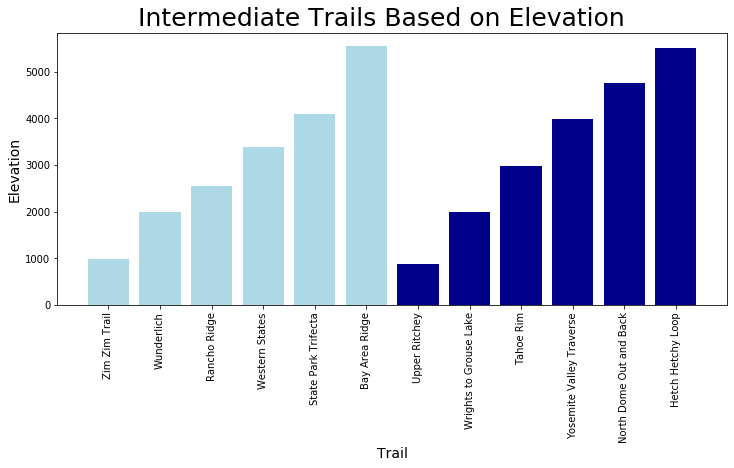

In [69]:
plt.bar(df_intermediate["name"],df_intermediate["ascent"], color=df_intermediate["color"], align="center")
plt.ylabel("Elevation", fontsize=14)
plt.xlabel("Trail", fontsize=14)
#plt.title("Best Intermediate Trail based on Elevation")
plt.figtext(.5,.9,'Intermediate Trails Based on Elevation', fontsize=25, ha='center')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"]=[12,5]
#plt.grid()
plt.savefig("Resources/Best Intermediate.png",bbox_inches = 'tight')
plt.bar


In [70]:
difficultTrails

,Unnamed: 0,id,name,type,summary,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,conditionStatus,conditionDetails,conditionDate
36,36,7056138,Eagle Peak Out and Back,Hike,Excellent workout with great views of Mt. Diablo.,Difficult,5.0,2,"Alamo, California",4.2,1435,-1434,1791,356,-122.0259,37.8340,All Clear,Mostly Dry,2020-01-20 16:02:23
39,39,7090570,Cache Creek Ford,Hike,"A long trek along ridgelines, and rolling hill...",Difficult,5.0,1,"Clearlake, California",13.1,1543,-2288,2208,903,-122.4158,39.0086,Unknown,NaN,1970-01-01 00:00:00
46,46,7085300,Rockbound Trail to Leland Lakes,Hike,Backpack through beautiful pine forests over r...,Difficult,5.0,1,"South Lake Tahoe, California",10.4,2719,-1528,8540,6967,-120.2391,38.8482,Unknown,NaN,1970-01-01 00:00:00
50,50,7024572,Round Top Loop,Hike,A moderate scramble up a Sierra Nevada peak.,Difficult,4.9,7,"South Lake Tahoe, California",6.9,2162,-2162,10338,8201,-120.0094,38.6916,Unknown,NaN,1970-01-01 00:00:00
51,51,7024997,Pyramid Peak - Rocky Canyon Trail,Hike,An epic trail leading to the summit of iconic ...,Difficult,4.8,21,"South Lake Tahoe, California",6.5,3915,-3913,9879,5964,-120.1359,38.8086,Unknown,NaN,1970-01-01 00:00:00
59,59,7085746,Ebbetts Pass to Carson Pass,Hike,Awesome hike along the PCT that winds through ...,Difficult,5.0,1,"South Lake Tahoe, California",29.0,4310,-4446,9121,7769,-119.8116,38.5446,Unknown,NaN,1970-01-01 00:00:00
61,61,7084337,Berkeley Hills,Hike,One of several ways to hike the beautiful trai...,Difficult,5.0,1,"Berkeley, California",3.5,995,-161,1355,467,-122.2440,37.8626,Unknown,NaN,1970-01-01 00:00:00
80,80,7045564,Monument Peak Summit Out and Back,Hike,This hike takes a combination of trails includ...,Difficult,3.5,2,"Milpitas, California",9.8,2491,-2492,2590,384,-121.9083,37.5043,Minor Issues,NaN,2020-01-20 16:59:12
88,88,7010691,Mount Tallac,Hike,An excellent hike with lots of variety and stu...,Difficult,4.8,51,"South Lake Tahoe, California",9.9,3266,-3266,9712,6446,-120.0682,38.9214,Unknown,NaN,1970-01-01 00:00:00
104,104,7020495,Rubicon Peak,Hike,A semi-secret trail leading to a rocky peak wi...,Difficult,5.0,8,"Tahoma, California",3.6,2087,-2085,9019,6932,-120.1234,39.0103,Unknown,NaN,1970-01-01 00:00:00


In [71]:
age_bins_d = [-1,1999, 3999,5999,7999,9999,11999 ]
group_names_d = ["0-2000", "2000-4000", "4000-6000","6000-8000", "8000-10000","10000-12000"]
difficultTrails["Range"] = pd.cut(difficultTrails["ascent"], age_bins_d, labels=group_names_d)

/Users/rubenbenitez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
summary_difficulty_trails = difficultTrails.groupby("Range")
summary_difficulty_trails_max = summary_difficulty_trails.max()
summary_difficulty_trails_max.reset_index(level = None, inplace = True)

In [73]:
best_difficulty_elevation = summary_difficulty_trails_max.drop(['id',"Unnamed: 0","conditionStatus","conditionDate"],axis=1)
best_difficulty_elevation

,Range,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude
0,0-2000,Upper Rogue Valley - Upper High Meadow - PG&E ...,Trail,Difficult,5.0,3.0,"Yosemite Valley, California",13.1,1552.0,-6.0,9369.0,8900.0,-119.3529,39.0086
1,2000-4000,Rubicon Peak,Hike,Difficult,5.0,51.0,"Tahoma, California",16.9,3915.0,-1528.0,10338.0,8201.0,-120.0094,39.0103
2,4000-6000,Happy Isles to Clouds Rest,Hike,Difficult,5.0,187.0,"Yosemite Valley, California",29.0,5782.0,-4142.0,9729.0,7769.0,-119.5581,38.5446
3,6000-8000,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8000-10000,None,None,None,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10000-12000,Yosemite Backcountry Loop,Hike,Difficult,5.0,3.0,"Yosemite Valley, California",60.6,10264.0,-10264.0,10100.0,4368.0,-119.3344,37.8776


In [74]:
df_difficult= best_difficulty_elevation.dropna(how='any')
df2_difficult = pd.DataFrame(df_difficult)
df2_difficult["color"]=df2_difficult["difficulty"].replace(['Difficult'],['darkslategrey'])
df2_difficult

,Range,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,color
0,0-2000,Upper Rogue Valley - Upper High Meadow - PG&E ...,Trail,Difficult,5.0,3.0,"Yosemite Valley, California",13.1,1552.0,-6.0,9369.0,8900.0,-119.3529,39.0086,darkslategrey
1,2000-4000,Rubicon Peak,Hike,Difficult,5.0,51.0,"Tahoma, California",16.9,3915.0,-1528.0,10338.0,8201.0,-120.0094,39.0103,darkslategrey
2,4000-6000,Happy Isles to Clouds Rest,Hike,Difficult,5.0,187.0,"Yosemite Valley, California",29.0,5782.0,-4142.0,9729.0,7769.0,-119.5581,38.5446,darkslategrey
5,10000-12000,Yosemite Backcountry Loop,Hike,Difficult,5.0,3.0,"Yosemite Valley, California",60.6,10264.0,-10264.0,10100.0,4368.0,-119.3344,37.8776,darkslategrey


In [75]:
df2_difficult['name'] = df2_difficult['name'].replace('Upper Rogue Valley - Upper High Meadow - PG&E Loop','Rogue Valley')
df2_difficult['name'] = df2_difficult['name'].replace('Yosemite Backcountry Loop','Yosemite Backcountry')
df2_difficult['name'] = df2_difficult['name'].replace('Happy Isles to Clouds Rest','Happy Isles to Clouds')

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

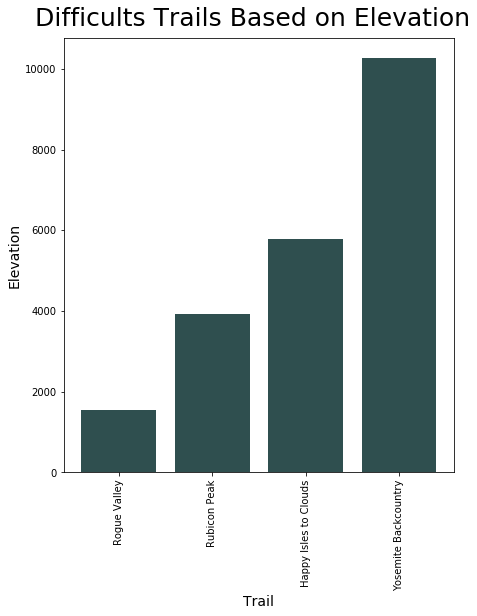

In [77]:
plt.bar(df_difficult["name"],df_difficult["ascent"], color=df_difficult["color"], align="center")
plt.ylabel("Elevation", fontsize=14)
plt.xlabel("Trail", fontsize=14)
#plt.title("Best Intermediate Trail based on Elevation")
plt.figtext(.5,.9,'Difficults Trails Based on Elevation', fontsize=25, ha='center')
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"]=[7,8]
plt.savefig("Resources/Best Difficult.png",bbox_inches = 'tight')

plt.bar

In [78]:
df_summary = pd.merge(df2_easy,df_intermediate,how = "outer")
df_final = pd.merge(df_summary,df2_difficult, how = 'outer')
df_final.head()

,Range,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,color
0,0-100,Woodland Trail,Trail,Easy,5.0,114.0,"Yosemite Valley, California",8.1,99.0,0.0,4052.0,3964.0,-119.5875,39.2959,lightgreen
1,100-200,Waterfall Trail,Trail,Easy,4.7,28.0,"Yosemite Valley, California",4.4,175.0,-3.0,7200.0,7067.0,-119.5744,39.2939,lightgreen
2,200-300,Snell Barn Loop,Trail,Easy,4.2,6.0,"North Auburn, California",3.7,228.0,-199.0,1563.0,1407.0,-121.1687,38.9643,lightgreen
3,300-400,Swinging Bridge,Trail,Easy,5.0,8.0,"Sheridan, California",4.8,392.0,0.0,4243.0,3974.0,-119.6561,38.9738,lightgreen
4,400-500,Harden Lake,Hike,Easy,3.0,1.0,"Yosemite Valley, California",5.9,499.0,-499.0,7862.0,7449.0,-119.6489,37.8703,lightgreen


In [79]:
df_final.to_csv('Best_trails_elevation.csv')

In [80]:
df_final1 = df_final.groupby('location')
df_final1.count()


,Range,name,type,difficulty,stars,starVotes,length,ascent,descent,high,low,longitude,latitude,color
location,,,,,,,,,,,,,,
"Bridgeport, California",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Calistoga, California",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Eldridge, California",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Jackson, California",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"North Auburn, California",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Sacramento, California",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Saratoga, California",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Sheridan, California",1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Tahoma, California",2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [81]:
df_final2 = df_final.sort_values(by=['location'], ascending=False)
df_final2.head()


,Range,name,type,difficulty,stars,starVotes,location,length,ascent,descent,high,low,longitude,latitude,color
0,0-100,Woodland Trail,Trail,Easy,5.0,114.0,"Yosemite Valley, California",8.1,99.0,0.0,4052.0,3964.0,-119.5875,39.2959,lightgreen
12,1000-2000,Wunderlich,Trail,Intermediate,5.0,48.0,"Yosemite Valley, California",25.4,1982.0,0.0,10444.0,8918.0,-119.3346,39.6144,lightblue
25,4000-6000,Happy Isles to Clouds,Hike,Difficult,5.0,187.0,"Yosemite Valley, California",29.0,5782.0,-4142.0,9729.0,7769.0,-119.5581,38.5446,darkslategrey
23,0-2000,Rogue Valley,Trail,Difficult,5.0,3.0,"Yosemite Valley, California",13.1,1552.0,-6.0,9369.0,8900.0,-119.3529,39.0086,darkslategrey
22,5000-6000,Hetch Hetchy Loop,Hike,Intermediate/Difficult,4.7,11.0,"Yosemite Valley, California",27.7,5499.0,-5500.0,7615.0,3777.0,-119.7883,37.9459,darkblue
